### Python based viewer tool for "Probabilistic Reasoning over time", EDAP01 Artificial Intelligence
This notebook has been provided to you by Alexander Dürr, teaching assistant on the course, spring term 2021. It is based on the ideas and structure of the original Java skeleton for this assignment, provided by Elin A. Topp. Contact us (elin_anna.topp at cs.lth.se) in case you need help!

### Note: Installing and activating widgets for Jupyter Notebook
To be able to display the visualization (dashboard,animations,etc.) you have to initially install the package  if you don't have it yet

### Note: Use Jupyter Lab for programming, Jupyter Notebook for visualization (optional)
This command only enables the extension for jupyter notebook and not in jupyter lab! You can edit from the comfort of jupyter lab though and when you feel like using the widgets just go to

Menu bar > Help > Launch Classic Notebook

## Here we go... all imports go through the models

### Your job is in the files Localizer.py and RobotSimAndFilter.py

In [1]:
from models import *

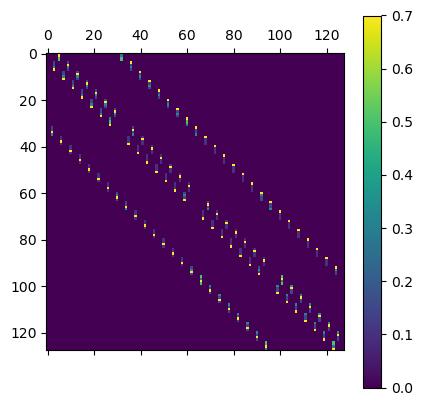

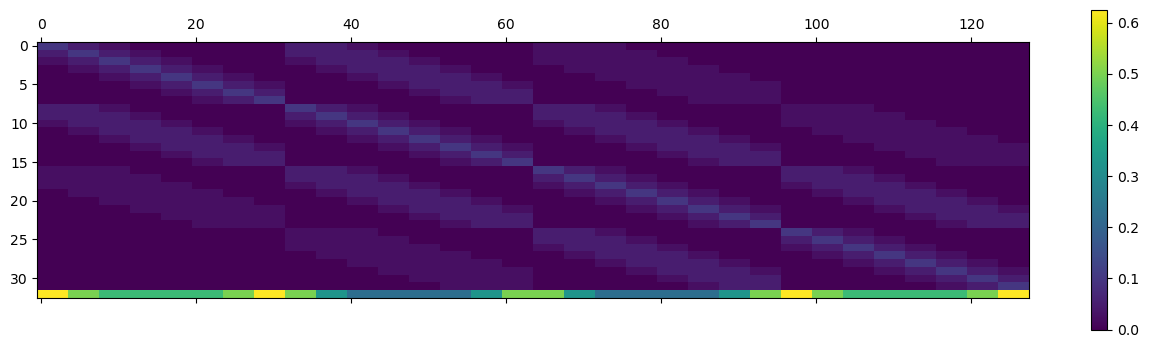

[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.1 0.  ... 0.  0.  0. ]
 [0.  0.  0.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
[[0.625 0.    0.    ... 0.    0.    0.   ]
 [0.    0.625 0.    ... 0.    0.    0.   ]
 [0.    0.    0.625 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.625 0.    0.   ]
 [0.    0.    0.    ... 0.    0.625 0.   ]
 [0.    0.    0.    ... 0.    0.    0.625]]
(False, 3, 5, 0, -1, -1, 0, 0, 10.0, array([0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.00781

In [3]:
# This cell shows how one can visualise the models and the output from the Localizer without the GUI

from models import *

# Testing the models, e.g., for an 4x8 grid

states = StateModel( 4, 8)
loc = Localizer( states)
tMat = loc.get_transition_model()
sVecs = loc.get_observation_model()
tMat.plot_T()
sVecs.plot_o_diags()
print(sVecs.get_o_reading(0))
print(sVecs.get_o_reading(None))

print(loc.update())


### Write your own "main" here (without the viewer)

3) Implementation (Your TODO #2!)
Implement a localisation / tracking approach based on an HMM and apply simple forward filtering to track the robot (according to the matrix-vector notation suggested in section 14.3.1 of the course book and the respective lecture slides, i.e. make use of the given models!).
This requires obviously a two-part implementation, as you first need to simulate the robot with its movement to have some ground truth to evaluate your tracking against, and simulate a sensor reading from this robot for the HMM-based tracking algorithm. You should make use of the given models both for the simulation and the filtering! Consider the general idea of randomised selection from a set or array based on a probability distribution for the simulation.
Your algorithm should then basically loop over the following three steps:
1. Move (simulated) robot to new pose according to transition model;
2. obtain (simulated) sensor reading based on its true, current, position given the
observation model;
3. update the position estimate (based on the probability distribution given as vector f)
with the forward-algorithm based on the sensor reading from step 2, using (again) the known sensor and transition models.
Note that a sensor reading of “nothing” normally means to do the forward step without update, i.e. it boils down to mere prediction in theory. However, here, you should not go the normal way, but always do a complete update.
Thus, even a “nothing” reading from the sensor should entail a proper prediction + update step!

In [2]:
from models import *
from models import RobotSimAndFilter as rf


In [1]:
# In this cell, you can write your own "main" to run and evaluate your 
# implementation without using the GUI below




### GUI-based visualisation, both for transition and sensor models and for actual runs of the filter, no changes needed

In [1]:
# In viewer, there is simply a file that handles all the thread based visualisation, no changes needed, 
# but feel free...

from viewer import *
from models import *

ROWS = 8
COLS = 8

# The dashboard creates an initial state model of the dimensions given by ROWS and COLS, sets up the respective 
# Transition and Observation models, as well as an instance of class Localizer. All methods already 
# given in Localizer should thus keep their behaviour - otherwise the calls from Dashboard might result in 
# wrong output. Consult the "Viewer Guide" for more details on the behaviour of the buttons and sliders.
dash = Dashboard.Dashboard(ROWS, COLS)
display(dash.db)


Hitrate: 0.0
number of None: 0
Error: 1.4142135623730951
Average error: 1.4142135623730951


true pose = <3, 0, 0>, sensed position = <2, 1>, guessed position = <2, 1>
nbr of moves: 1, avg error: 1.4142135623730951, nbr correct guesses: 0
Hitrate: 0.0
number of None: 1
Error: 3.1622776601683795
Average error: 2.2882456112707374


true pose = <3, 1, 1>, sensed nothing
nbr of moves: 2, avg error: 2.2882456112707374, nbr correct guesses: 0
Hitrate: 0.0
number of None: 1
Error: 2.0
Average error: 2.192163740847158


true pose = <3, 2, 1>, sensed position = <3, 1>, guessed position = <3, 0>
nbr of moves: 3, avg error: 2.192163740847158, nbr correct guesses: 0
Hitrate: 0.0
number of None: 1
Error: 1.0
Average error: 1.8941228056353687


true pose = <3, 3, 1>, sensed position = <1, 4>, guessed position = <3, 2>
nbr of moves: 4, avg error: 1.8941228056353687, nbr correct guesses: 0
Hitrate: 0.0
number of None: 1
Error: 1.0
Average error: 1.7152982445082947


true pose = <4, 3, 0>, sensed position = <5, 2>, guessed position = <3, 3>
nbr of moves: 5, avg error: 1.7152982445082947, nbr correct guesses: 0
Hitrate: 0.0
number of None: 1
Error: 1.0
Average error: 1.596081870423579


true pose = <5, 3, 0>, sensed position = <6, 2>, guessed position = <5, 2>
nbr of moves: 6, avg error: 1.596081870423579, nbr correct guesses: 0
Hitrate: 0.0
number of None: 1
Error: 1.0
Average error: 1.5109273175059248


true pose = <5, 4, 1>, sensed position = <3, 2>, guessed position = <5, 3>
nbr of moves: 7, avg error: 1.5109273175059248, nbr correct guesses: 0
Hitrate: 0.0
number of None: 1
Error: 1.0
Average error: 1.4470614028176843


true pose = <5, 5, 1>, sensed position = <5, 5>, guessed position = <5, 4>
nbr of moves: 8, avg error: 1.4470614028176843, nbr correct guesses: 0
Hitrate: 0.0
number of None: 1
Error: 1.0
Average error: 1.3973879136157192


true pose = <5, 6, 1>, sensed position = <7, 7>, guessed position = <5, 5>
nbr of moves: 9, avg error: 1.3973879136157192, nbr correct guesses: 0
Hitrate: 0.0
number of None: 1
Error: 1.0
Average error: 1.3576491222541474


true pose = <4, 6, 2>, sensed position = <2, 5>, guessed position = <4, 5>
nbr of moves: 10, avg error: 1.3576491222541474, nbr correct guesses: 0
Hitrate: 0.09090909090909091
number of None: 2
Error: 0.0
Average error: 1.2342264747764977


true pose = <3, 6, 2>, sensed nothing
nbr of moves: 11, avg error: 1.2342264747764977, nbr correct guesses: 1
Hitrate: 0.16666666666666666
number of None: 2
Error: 0.0
Average error: 1.131374268545123


true pose = <2, 6, 2>, sensed position = <3, 7>, guessed position = <2, 6>
nbr of moves: 12, avg error: 1.131374268545123, nbr correct guesses: 2
Hitrate: 0.23076923076923078
number of None: 2
Error: 0.0
Average error: 1.0443454786570365


true pose = <1, 6, 2>, sensed position = <3, 4>, guessed position = <1, 6>
nbr of moves: 13, avg error: 1.0443454786570365, nbr correct guesses: 3
Hitrate: 0.2857142857142857
number of None: 2
Error: 0.0
Average error: 0.9697493730386767


true pose = <0, 6, 2>, sensed position = <0, 6>, guessed position = <0, 6>
nbr of moves: 14, avg error: 0.9697493730386767, nbr correct guesses: 4
Hitrate: 0.3333333333333333
number of None: 2
Error: 0.0
Average error: 0.9050994148360982


true pose = <1, 6, 0>, sensed position = <3, 7>, guessed position = <1, 6>
nbr of moves: 15, avg error: 0.9050994148360982, nbr correct guesses: 5
Hitrate: 0.375
number of None: 3
Error: 0.0
Average error: 0.8485307014088421


true pose = <2, 6, 0>, sensed nothing
nbr of moves: 16, avg error: 0.8485307014088421, nbr correct guesses: 6
Hitrate: 0.4117647058823529
number of None: 3
Error: 0.0
Average error: 0.7986171307377338


true pose = <3, 6, 0>, sensed position = <2, 5>, guessed position = <3, 6>
nbr of moves: 17, avg error: 0.7986171307377338, nbr correct guesses: 7
Hitrate: 0.4444444444444444
number of None: 3
Error: 0.0
Average error: 0.7542495123634152


true pose = <4, 6, 0>, sensed position = <5, 7>, guessed position = <4, 6>
nbr of moves: 18, avg error: 0.7542495123634152, nbr correct guesses: 8
Hitrate: 0.47368421052631576
number of None: 3
Error: 0.0
Average error: 0.714552169607446


true pose = <5, 6, 0>, sensed position = <7, 5>, guessed position = <5, 6>
nbr of moves: 19, avg error: 0.714552169607446, nbr correct guesses: 9
Hitrate: 0.5
number of None: 3
Error: 0.0
Average error: 0.6788245611270737


true pose = <6, 6, 0>, sensed position = <6, 4>, guessed position = <6, 6>
nbr of moves: 20, avg error: 0.6788245611270737, nbr correct guesses: 10
Hitrate: 0.5238095238095238
number of None: 3
Error: 0.0
Average error: 0.6464995820257845


true pose = <7, 6, 0>, sensed position = <7, 7>, guessed position = <7, 6>
nbr of moves: 21, avg error: 0.6464995820257845, nbr correct guesses: 11
Hitrate: 0.5454545454545454
number of None: 3
Error: 0.0
Average error: 0.6171132373882489


true pose = <6, 6, 2>, sensed position = <6, 6>, guessed position = <6, 6>
nbr of moves: 22, avg error: 0.6171132373882489, nbr correct guesses: 12
Hitrate: 0.5652173913043478
number of None: 4
Error: 0.0
Average error: 0.5902822270670206


true pose = <5, 6, 2>, sensed nothing
nbr of moves: 23, avg error: 0.5902822270670206, nbr correct guesses: 13
Hitrate: 0.5416666666666666
number of None: 4
Error: 1.4142135623730951
Average error: 0.6246126993714404


true pose = <4, 6, 2>, sensed position = <5, 6>, guessed position = <5, 7>
nbr of moves: 24, avg error: 0.6246126993714404, nbr correct guesses: 13
Hitrate: 0.52
number of None: 5
Error: 1.4142135623730951
Average error: 0.6561967338915067


true pose = <3, 6, 2>, sensed nothing
nbr of moves: 25, avg error: 0.6561967338915067, nbr correct guesses: 13
Hitrate: 0.5384615384615384
number of None: 5
Error: 0.0
Average error: 0.6309583979726026


true pose = <3, 7, 1>, sensed position = <4, 6>, guessed position = <3, 7>
nbr of moves: 26, avg error: 0.6309583979726026, nbr correct guesses: 14
Hitrate: 0.5185185185185185
number of None: 5
Error: 2.0
Average error: 0.6816636424921357


true pose = <4, 7, 0>, sensed position = <4, 5>, guessed position = <4, 5>
nbr of moves: 27, avg error: 0.6816636424921357, nbr correct guesses: 14
Hitrate: 0.5
number of None: 6
Error: 4.0
Average error: 0.8001756552602738


true pose = <5, 7, 0>, sensed nothing
nbr of moves: 28, avg error: 0.8001756552602738, nbr correct guesses: 14
Hitrate: 0.5172413793103449
number of None: 6
Error: 0.0
Average error: 0.7725833912857816


true pose = <6, 7, 0>, sensed position = <7, 7>, guessed position = <6, 7>
nbr of moves: 29, avg error: 0.7725833912857816, nbr correct guesses: 15
Hitrate: 0.5333333333333333
number of None: 7
Error: 0.0
Average error: 0.7468306115762555


true pose = <7, 7, 0>, sensed nothing
nbr of moves: 30, avg error: 0.7468306115762555, nbr correct guesses: 16
Hitrate: 0.5161290322580645
number of None: 7
Error: 1.4142135623730951
Average error: 0.7683590938600245


true pose = <6, 7, 2>, sensed position = <7, 5>, guessed position = <7, 6>
nbr of moves: 31, avg error: 0.7683590938600245, nbr correct guesses: 16
Hitrate: 0.5
number of None: 7
Error: 2.8284271247461903
Average error: 0.8327362198252173


true pose = <5, 7, 2>, sensed position = <6, 7>, guessed position = <7, 5>
nbr of moves: 32, avg error: 0.8327362198252173, nbr correct guesses: 16
Hitrate: 0.5151515151515151
number of None: 7
Error: 0.0
Average error: 0.8075017889214228


true pose = <4, 7, 2>, sensed position = <5, 7>, guessed position = <4, 7>
nbr of moves: 33, avg error: 0.8075017889214228, nbr correct guesses: 17
Hitrate: 0.5
number of None: 8
Error: 2.0
Average error: 0.8425752657178516


true pose = <5, 7, 0>, sensed nothing
nbr of moves: 34, avg error: 0.8425752657178516, nbr correct guesses: 17
Hitrate: 0.4857142857142857
number of None: 8
Error: 1.4142135623730951
Average error: 0.85890778847943


true pose = <6, 7, 0>, sensed position = <6, 5>, guessed position = <7, 6>
nbr of moves: 35, avg error: 0.85890778847943, nbr correct guesses: 17
Hitrate: 0.4722222222222222
number of None: 8
Error: 2.8284271247461903
Average error: 0.9136166589312844


true pose = <5, 7, 2>, sensed position = <6, 5>, guessed position = <7, 5>
nbr of moves: 36, avg error: 0.9136166589312844, nbr correct guesses: 17
Hitrate: 0.4594594594594595
number of None: 9
Error: 4.242640687119285
Average error: 1.0035902813147437


true pose = <4, 7, 2>, sensed nothing
nbr of moves: 37, avg error: 1.0035902813147437, nbr correct guesses: 17
Hitrate: 0.4473684210526316
number of None: 10
Error: 5.656854249492381
Average error: 1.1260445962667869


true pose = <3, 7, 2>, sensed nothing
nbr of moves: 38, avg error: 1.1260445962667869, nbr correct guesses: 17
Hitrate: 0.46153846153846156
number of None: 10
Error: 0.0
Average error: 1.0971716579009718


true pose = <4, 7, 0>, sensed position = <3, 6>, guessed position = <4, 7>
nbr of moves: 39, avg error: 1.0971716579009718, nbr correct guesses: 18
Hitrate: 0.45
number of None: 11
Error: 2.0
Average error: 1.1197423664534476


true pose = <5, 7, 0>, sensed nothing
nbr of moves: 40, avg error: 1.1197423664534476, nbr correct guesses: 18
Hitrate: 0.43902439024390244
number of None: 11
Error: 2.0
Average error: 1.1412120648326318


true pose = <6, 7, 0>, sensed position = <5, 6>, guessed position = <4, 7>
nbr of moves: 41, avg error: 1.1412120648326318, nbr correct guesses: 18
Hitrate: 0.4523809523809524
number of None: 12
Error: 0.0
Average error: 1.1140403490032835


true pose = <7, 7, 0>, sensed nothing
nbr of moves: 42, avg error: 1.1140403490032835, nbr correct guesses: 19
Hitrate: 0.4418604651162791
number of None: 13
Error: 1.4142135623730951
Average error: 1.1210211214072325


true pose = <7, 6, 3>, sensed nothing
nbr of moves: 43, avg error: 1.1210211214072325, nbr correct guesses: 19
Hitrate: 0.4318181818181818
number of None: 14
Error: 2.0
Average error: 1.1409979141025226


true pose = <7, 5, 3>, sensed nothing
nbr of moves: 44, avg error: 1.1409979141025226, nbr correct guesses: 19
Hitrate: 0.4222222222222222
number of None: 15
Error: 3.1622776601683795
Average error: 1.1859152417928749


true pose = <7, 4, 3>, sensed nothing
nbr of moves: 45, avg error: 1.1859152417928749, nbr correct guesses: 19
Hitrate: 0.41304347826086957
number of None: 16
Error: 4.47213595499958
Average error: 1.25735482251476


true pose = <7, 3, 3>, sensed nothing
nbr of moves: 46, avg error: 1.25735482251476, nbr correct guesses: 19
Hitrate: 0.40425531914893614
number of None: 17
Error: 5.830951894845301
Average error: 1.3546653985217927


true pose = <7, 2, 3>, sensed nothing
nbr of moves: 47, avg error: 1.3546653985217927, nbr correct guesses: 19
Hitrate: 0.4166666666666667
number of None: 17
Error: 0.0
Average error: 1.3264432027192552


true pose = <7, 1, 3>, sensed position = <7, 1>, guessed position = <7, 1>
nbr of moves: 48, avg error: 1.3264432027192552, nbr correct guesses: 20
Hitrate: 0.40816326530612246
number of None: 18
Error: 2.0
Average error: 1.3401892598066174


true pose = <7, 2, 1>, sensed nothing
nbr of moves: 49, avg error: 1.3401892598066174, nbr correct guesses: 20
Hitrate: 0.4
number of None: 18
Error: 2.0
Average error: 1.353385474610485


true pose = <7, 3, 1>, sensed position = <7, 2>, guessed position = <7, 1>
nbr of moves: 50, avg error: 1.353385474610485, nbr correct guesses: 20
Hitrate: 0.4117647058823529
number of None: 18
Error: 0.0
Average error: 1.3268485045200833


true pose = <7, 4, 1>, sensed position = <7, 4>, guessed position = <7, 4>
nbr of moves: 51, avg error: 1.3268485045200833, nbr correct guesses: 21
Hitrate: 0.4230769230769231
number of None: 18
Error: 0.0
Average error: 1.3013321871254664


true pose = <7, 5, 1>, sensed position = <7, 6>, guessed position = <7, 5>
nbr of moves: 52, avg error: 1.3013321871254664, nbr correct guesses: 22
Hitrate: 0.4339622641509434
number of None: 19
Error: 0.0
Average error: 1.2767787496325331


true pose = <7, 6, 1>, sensed nothing
nbr of moves: 53, avg error: 1.2767787496325331, nbr correct guesses: 23
Hitrate: 0.4444444444444444
number of None: 20
Error: 0.0
Average error: 1.253134698713412


true pose = <7, 7, 1>, sensed nothing
nbr of moves: 54, avg error: 1.253134698713412, nbr correct guesses: 24
Hitrate: 0.45454545454545453
number of None: 20
Error: 0.0
Average error: 1.2303504314640774


true pose = <7, 6, 3>, sensed position = <7, 4>, guessed position = <7, 6>
nbr of moves: 55, avg error: 1.2303504314640774, nbr correct guesses: 25
Hitrate: 0.44642857142857145
number of None: 21
Error: 2.0
Average error: 1.2440941737593616


true pose = <7, 7, 1>, sensed nothing
nbr of moves: 56, avg error: 1.2440941737593616, nbr correct guesses: 25
Hitrate: 0.43859649122807015
number of None: 22
Error: 3.1622776601683795
Average error: 1.2777465156261867


true pose = <6, 7, 2>, sensed nothing
nbr of moves: 57, avg error: 1.2777465156261867, nbr correct guesses: 25
Hitrate: 0.43103448275862066
number of None: 23
Error: 2.0
Average error: 1.2901991619084938


true pose = <5, 7, 2>, sensed nothing
nbr of moves: 58, avg error: 1.2901991619084938, nbr correct guesses: 25
Hitrate: 0.423728813559322
number of None: 23
Error: 2.0
Average error: 1.3022296845880108


true pose = <4, 7, 2>, sensed position = <5, 7>, guessed position = <6, 7>
nbr of moves: 59, avg error: 1.3022296845880108, nbr correct guesses: 25
Hitrate: 0.4166666666666667
number of None: 24
Error: 2.0
Average error: 1.3138591898448773


true pose = <3, 7, 2>, sensed nothing
nbr of moves: 60, avg error: 1.3138591898448773, nbr correct guesses: 25
Hitrate: 0.4098360655737705
number of None: 24
Error: 2.0
Average error: 1.3251073998474203


true pose = <2, 7, 2>, sensed position = <3, 6>, guessed position = <4, 7>
nbr of moves: 61, avg error: 1.3251073998474203, nbr correct guesses: 25
Hitrate: 0.41935483870967744
number of None: 24
Error: 0.0
Average error: 1.3037346998498813


true pose = <1, 7, 2>, sensed position = <1, 7>, guessed position = <1, 7>
nbr of moves: 62, avg error: 1.3037346998498813, nbr correct guesses: 26
Hitrate: 0.4126984126984127
number of None: 24
Error: 1.4142135623730951
Average error: 1.3054883325883448


true pose = <1, 6, 3>, sensed position = <0, 7>, guessed position = <0, 7>
nbr of moves: 63, avg error: 1.3054883325883448, nbr correct guesses: 26
Hitrate: 0.40625
number of None: 24
Error: 1.4142135623730951
Average error: 1.3071871643037316


true pose = <1, 5, 3>, sensed position = <1, 5>, guessed position = <0, 6>
nbr of moves: 64, avg error: 1.3071871643037316, nbr correct guesses: 26
Hitrate: 0.4153846153846154
number of None: 24
Error: 0.0
Average error: 1.2870765925452126


true pose = <1, 4, 3>, sensed position = <1, 2>, guessed position = <1, 4>
nbr of moves: 65, avg error: 1.2870765925452126, nbr correct guesses: 27
Hitrate: 0.42424242424242425
number of None: 24
Error: 0.0
Average error: 1.2675754320521033


true pose = <1, 3, 3>, sensed position = <3, 5>, guessed position = <1, 3>
nbr of moves: 66, avg error: 1.2675754320521033, nbr correct guesses: 28
Hitrate: 0.43283582089552236
number of None: 24
Error: 0.0
Average error: 1.2486563957528183


true pose = <1, 2, 3>, sensed position = <1, 2>, guessed position = <1, 2>
nbr of moves: 67, avg error: 1.2486563957528183, nbr correct guesses: 29
Hitrate: 0.4411764705882353
number of None: 24
Error: 0.0
Average error: 1.2302938016976297


true pose = <1, 1, 3>, sensed position = <0, 2>, guessed position = <1, 1>
nbr of moves: 68, avg error: 1.2302938016976297, nbr correct guesses: 30
Hitrate: 0.4492753623188406
number of None: 25
Error: 0.0
Average error: 1.2124634567454902


true pose = <1, 0, 3>, sensed nothing
nbr of moves: 69, avg error: 1.2124634567454902, nbr correct guesses: 31
Hitrate: 0.45714285714285713
number of None: 26
Error: 0.0
Average error: 1.1951425502205546


true pose = <0, 0, 2>, sensed nothing
nbr of moves: 70, avg error: 1.1951425502205546, nbr correct guesses: 32
Hitrate: 0.4507042253521127
number of None: 27
Error: 1.4142135623730951
Average error: 1.1982280574339705


true pose = <1, 0, 0>, sensed nothing
nbr of moves: 71, avg error: 1.1982280574339705, nbr correct guesses: 32
Hitrate: 0.4444444444444444
number of None: 27
Error: 2.0
Average error: 1.2093637788584988


true pose = <0, 0, 2>, sensed position = <1, 1>, guessed position = <2, 0>
nbr of moves: 72, avg error: 1.2093637788584988, nbr correct guesses: 32
Hitrate: 0.4383561643835616
number of None: 27
Error: 1.4142135623730951
Average error: 1.212169940276507


true pose = <1, 0, 0>, sensed position = <3, 2>, guessed position = <2, 1>
nbr of moves: 73, avg error: 1.212169940276507, nbr correct guesses: 32
Hitrate: 0.43243243243243246
number of None: 28
Error: 4.0
Average error: 1.2498433194619596


true pose = <0, 0, 2>, sensed nothing
nbr of moves: 74, avg error: 1.2498433194619596, nbr correct guesses: 32
Hitrate: 0.4266666666666667
number of None: 28
Error: 3.1622776601683795
Average error: 1.2753424440047119


true pose = <0, 1, 1>, sensed position = <1, 3>, guessed position = <1, 4>
nbr of moves: 75, avg error: 1.2753424440047119, nbr correct guesses: 32
Hitrate: 0.42105263157894735
number of None: 29
Error: 1.4142135623730951
Average error: 1.2771696955621905


true pose = <1, 1, 0>, sensed nothing
nbr of moves: 76, avg error: 1.2771696955621905, nbr correct guesses: 32
Hitrate: 0.4155844155844156
number of None: 29
Error: 1.4142135623730951
Average error: 1.2789494860402542


true pose = <2, 1, 0>, sensed position = <2, 0>, guessed position = <1, 0>
nbr of moves: 77, avg error: 1.2789494860402542, nbr correct guesses: 32
Hitrate: 0.41025641025641024
number of None: 30
Error: 1.4142135623730951
Average error: 1.2806836408650342


true pose = <3, 1, 0>, sensed nothing
nbr of moves: 78, avg error: 1.2806836408650342, nbr correct guesses: 32
Hitrate: 0.4050632911392405
number of None: 31
Error: 2.0
Average error: 1.2897889112338312


true pose = <2, 1, 2>, sensed nothing
nbr of moves: 79, avg error: 1.2897889112338312, nbr correct guesses: 32
Hitrate: 0.4
number of None: 31
Error: 1.4142135623730951
Average error: 1.291344219373072


true pose = <1, 1, 2>, sensed position = <1, 2>, guessed position = <0, 2>
nbr of moves: 80, avg error: 1.291344219373072, nbr correct guesses: 32
Hitrate: 0.3950617283950617
number of None: 32
Error: 2.0
Average error: 1.3000930561709354


true pose = <0, 1, 2>, sensed nothing
nbr of moves: 81, avg error: 1.3000930561709354, nbr correct guesses: 32
Hitrate: 0.3902439024390244
number of None: 33
Error: 4.0
Average error: 1.3330187506078752


true pose = <0, 0, 3>, sensed nothing
nbr of moves: 82, avg error: 1.3330187506078752, nbr correct guesses: 32
Hitrate: 0.39759036144578314
number of None: 34
Error: 0.0
Average error: 1.3169582837330815


true pose = <0, 1, 1>, sensed nothing
nbr of moves: 83, avg error: 1.3169582837330815, nbr correct guesses: 33
Hitrate: 0.39285714285714285
number of None: 35
Error: 1.4142135623730951
Average error: 1.318116084669272


true pose = <1, 1, 0>, sensed nothing
nbr of moves: 84, avg error: 1.318116084669272, nbr correct guesses: 33
Hitrate: 0.38823529411764707
number of None: 35
Error: 1.4142135623730951
Average error: 1.3192466432304935


true pose = <2, 1, 0>, sensed position = <2, 1>, guessed position = <1, 0>
nbr of moves: 85, avg error: 1.3192466432304935, nbr correct guesses: 33
Hitrate: 0.38372093023255816
number of None: 35
Error: 1.4142135623730951
Average error: 1.3203509097321515


true pose = <1, 1, 2>, sensed position = <1, 3>, guessed position = <0, 2>
nbr of moves: 86, avg error: 1.3203509097321515, nbr correct guesses: 33
Hitrate: 0.3793103448275862
number of None: 36
Error: 2.0
Average error: 1.3281629682409775


true pose = <0, 1, 2>, sensed nothing
nbr of moves: 87, avg error: 1.3281629682409775, nbr correct guesses: 33
Hitrate: 0.375
number of None: 36
Error: 3.1622776601683795
Average error: 1.3490051806492434


true pose = <1, 1, 0>, sensed position = <2, 3>, guessed position = <0, 4>
nbr of moves: 88, avg error: 1.3490051806492434, nbr correct guesses: 33
Hitrate: 0.3707865168539326
number of None: 37
Error: 4.47213595499958
Average error: 1.3840965376644156


true pose = <2, 1, 0>, sensed nothing
nbr of moves: 89, avg error: 1.3840965376644156, nbr correct guesses: 33
Hitrate: 0.36666666666666664
number of None: 37
Error: 1.4142135623730951
Average error: 1.3844311712722899


true pose = <1, 1, 2>, sensed position = <0, 0>, guessed position = <0, 0>
nbr of moves: 90, avg error: 1.3844311712722899, nbr correct guesses: 33
Hitrate: 0.37362637362637363
number of None: 38
Error: 0.0
Average error: 1.3692176419176494


true pose = <0, 1, 2>, sensed nothing
nbr of moves: 91, avg error: 1.3692176419176494, nbr correct guesses: 34
Hitrate: 0.3695652173913043
number of None: 38
Error: 2.8284271247461903
Average error: 1.38507861455709


true pose = <0, 2, 1>, sensed position = <1, 0>, guessed position = <2, 0>
nbr of moves: 92, avg error: 1.38507861455709, nbr correct guesses: 34
Hitrate: 0.3655913978494624
number of None: 39
Error: 3.1622776601683795
Average error: 1.4041882817142006


true pose = <0, 1, 3>, sensed nothing
nbr of moves: 93, avg error: 1.4041882817142006, nbr correct guesses: 34
Hitrate: 0.3617021276595745
number of None: 39
Error: 2.0
Average error: 1.410526704249156


true pose = <0, 0, 3>, sensed position = <1, 1>, guessed position = <2, 0>
nbr of moves: 94, avg error: 1.410526704249156, nbr correct guesses: 34
Hitrate: 0.35789473684210527
number of None: 40
Error: 3.1622776601683795
Average error: 1.428966187995674


true pose = <0, 1, 1>, sensed nothing
nbr of moves: 95, avg error: 1.428966187995674, nbr correct guesses: 34
Hitrate: 0.3541666666666667
number of None: 41
Error: 2.0
Average error: 1.434914456870719


true pose = <0, 2, 1>, sensed nothing
nbr of moves: 96, avg error: 1.434914456870719, nbr correct guesses: 34
Hitrate: 0.36082474226804123
number of None: 41
Error: 0.0
Average error: 1.4201215243256602


true pose = <0, 3, 1>, sensed position = <0, 3>, guessed position = <0, 3>
nbr of moves: 97, avg error: 1.4201215243256602, nbr correct guesses: 35
Hitrate: 0.3673469387755102
number of None: 41
Error: 0.0
Average error: 1.4056304883631534


true pose = <0, 4, 1>, sensed position = <0, 3>, guessed position = <0, 4>
nbr of moves: 98, avg error: 1.4056304883631534, nbr correct guesses: 36
Hitrate: 0.37373737373737376
number of None: 42
Error: 0.0
Average error: 1.3914322006019093


true pose = <0, 5, 1>, sensed nothing
nbr of moves: 99, avg error: 1.3914322006019093, nbr correct guesses: 37
Hitrate: 0.38
number of None: 43
Error: 0.0
Average error: 1.3775178785958904


true pose = <0, 6, 1>, sensed nothing
nbr of moves: 100, avg error: 1.3775178785958904, nbr correct guesses: 38
Hitrate: 0.38613861386138615
number of None: 43
Error: 0.0
Average error: 1.3638790877187033


true pose = <0, 7, 1>, sensed position = <2, 5>, guessed position = <0, 7>
nbr of moves: 101, avg error: 1.3638790877187033, nbr correct guesses: 39
Hitrate: 0.38235294117647056
number of None: 44
Error: 1.4142135623730951
Average error: 1.364372562960413


true pose = <1, 7, 0>, sensed nothing
nbr of moves: 102, avg error: 1.364372562960413, nbr correct guesses: 39
Hitrate: 0.3786407766990291
number of None: 44
Error: 1.4142135623730951
Average error: 1.3648564561585945


true pose = <1, 6, 3>, sensed position = <1, 5>, guessed position = <0, 5>
nbr of moves: 103, avg error: 1.3648564561585945, nbr correct guesses: 39
Hitrate: 0.375
number of None: 44
Error: 1.4142135623730951
Average error: 1.3653310437183495


true pose = <1, 5, 3>, sensed position = <2, 4>, guessed position = <0, 4>
nbr of moves: 104, avg error: 1.3653310437183495, nbr correct guesses: 39
Hitrate: 0.37142857142857144
number of None: 45
Error: 1.4142135623730951
Average error: 1.3657965915150614


true pose = <1, 4, 3>, sensed nothing
nbr of moves: 105, avg error: 1.3657965915150614, nbr correct guesses: 39
Hitrate: 0.36792452830188677
number of None: 46
Error: 1.4142135623730951
Average error: 1.3662533553910807


true pose = <1, 3, 3>, sensed nothing
nbr of moves: 106, avg error: 1.3662533553910807, nbr correct guesses: 39
Hitrate: 0.3644859813084112
number of None: 46
Error: 4.0
Average error: 1.390867810013594


true pose = <1, 2, 3>, sensed position = <3, 4>, guessed position = <1, 6>
nbr of moves: 107, avg error: 1.390867810013594, nbr correct guesses: 39
